# Proyek Analisis Data: Air Quality
- **Nama:** Muhammad Arief Pratama

## Landasan Teori

### Pengertian Analisis Data
Analisis data adalah proses inspeksi, pembersihan, transformasi, dan pemodelan data dengan tujuan menemukan informasi yang berguna, menginformasikan kesimpulan, dan mendukung pengambilan keputusan.

### Perbedaan Descriptive Analysis dan Exploratory Data Analysis (EDA)
- **Descriptive Analysis:** Berfokus pada menggambarkan karakteristik dasar data (seperti mean, median, modus) untuk memahami "apa yang telah terjadi".
- **Exploratory Data Analysis (EDA):** Pendekatan untuk menganalisis data guna meringkas karakteristik utamanya, seringkali menggunakan metode visual, untuk menemukan pola, anomali, atau hubungan yang belum diketahui sebelumnya.

### Pentingnya Data Cleaning dan Data Wrangling
Data mentah seringkali tidak lengkap, tidak konsisten, atau mengandung kesalahan. Data cleaning dan wrangling sangat penting untuk memastikan akurasi analisis. Tanpa proses ini, hasil analisis bisa bias atau tidak valid ("Garbage In, Garbage Out").

### Peran Visualisasi Data
Visualisasi data mengubah data numerik menjadi representasi grafis (seperti diagram batang, scatter plot). Ini memudahkan pemangku kepentingan untuk memahami tren, outlier, dan pola dalam data yang sulit dilihat hanya dari tabel angka.

### Penerapan Machine Learning: Clustering (K-Means)
Dalam analisis ini, teknik Machine Learning yang digunakan adalah **K-Means Clustering**.

- **Alasan Penggunaan:** Dataset kualitas udara memiliki pola multidimensi yang kompleks antara faktor cuaca (suhu, angin, hujan) dan tingkat polusi. K-Means dipilih karena merupakan algoritma *Unsupervised Learning* yang efisien untuk mengelompokkan data tanpa label ke dalam beberapa kategori (cluster) berdasarkan kemiripan karakteristiknya.
- **Tujuan:** Mengelompokkan kondisi harian menjadi beberapa kategori (misalnya: "Kualitas Udara Baik", "Sedang", atau "Buruk") secara otomatis berdasarkan pola data historis, bukan aturan manual. Hal ini membantu kita memahami karakteristik cuaca dominan yang menciptakan kondisi polusi tertentu.

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana tren kualitas udara (PM2.5) dari tahun ke tahun di berbagai stasiun pengamatan? Apakah ada pola musiman tertentu?
- **Pertanyaan 2:** Bagaimana pengaruh faktor cuaca (suhu, curah hujan, dan kecepatan angin) terhadap tingkat polusi udara (PM2.5)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [3]:
# Menyiapkan path ke folder dataset
folder_path = "PRSA_Data_20130301-20170228"

# Ambil semua file CSV
file_pattern = os.path.join(folder_path, "*.csv")
all_files = glob.glob(file_pattern)

# List untuk menampung dataframe
df_list = []

# Loop untuk membaca setiap file dan menambahkannya ke list
for filename in all_files:
    df_temp = pd.read_csv(filename)
    df_list.append(df_temp)

# Menggabungkan semua dataframe menjadi satu
main_df = pd.concat(df_list, axis=0, ignore_index=True)

# Menampilkan 5 baris pertama
print(f"Total data berhasil digabungkan: {main_df.shape[0]} baris")
main_df.head()

Cloning into 'HTI'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 11), reused 24 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 10.22 MiB | 17.62 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Total data berhasil digabungkan: 420768 baris


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


**Insight:**
- Dataset gabungan berhasil memuat **420.768 baris** data dari 12 stasiun berbeda.
- Terdapat 18 kolom, yang terdiri dari data waktu (`year`, `month`, `day`, `hour`), data polutan (`PM2.5`, `PM10`, `SO2`, etc.), dan data meteorologi (`TEMP`, `PRES`, etc.).

### Assessing Data

In [4]:
# Melihat informasi umum (tipe data dan jumlah non-null)
print("INFO DATA:")
main_df.info()

print("\n" + "="*50 + "\n")

# Melihat statistik deskriptif (mean, min, max, std)
print("STATISTIK DESKRIPTIF:")
print(main_df.describe())

print("\n" + "="*50 + "\n")

# Mengecek jumlah missing value per kolom
print("JUMLAH MISSING VALUES:")
print(main_df.isna().sum())

print("\n" + "="*50 + "\n")

# Mengecek apakah ada data duplikat
print(f"Jumlah Duplikasi: {main_df.duplicated().sum()}")

INFO DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


STATISTIK DESKRIPTIF:
          

**Insight:**
- Terdapat *missing values* (data hilang) yang cukup signifikan pada kolom polutan, terutama `CO` (sekitar 20.000 data hilang) dan `PM2.5` (sekitar 8.000 data hilang).
- Kolom meteorologi (`TEMP`, `PRES`, `DEWP`) memiliki data hilang yang relatif sedikit (< 500).
- Data hilang ini perlu ditangani (imputasi) agar tidak mengganggu proses analisis dan visualisasi.
- Kolom waktu terpisah (`year`, `month`, `day`, `hour`) sebaiknya digabungkan menjadi satu kolom bertipe `datetime` untuk memudahkan analisis *time-series*.
- Kolom `wd` (Wind Direction) bertipe objek/string, sisanya numerik.
- Tidak ditemukan data duplikat (`0 duplicates`), yang berarti integritas data terjaga.

### Cleaning Data

In [5]:
# 1. MEMPERBAIKI TIPE DATA (DATETIME)
# Menggabungkan kolom year, month, day, hour menjadi satu kolom 'datetime'
main_df['datetime'] = pd.to_datetime(main_df[['year', 'month', 'day', 'hour']])

# Mendrop kolom waktu terpisah agar dataframe lebih rapi
main_df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# Memindahkan kolom 'datetime' ke posisi pertama (opsional, untuk estetika)
column_order = ['datetime'] + [col for col in main_df.columns if col != 'datetime']
main_df = main_df[column_order]

print("Kolom datetime berhasil dibuat!")

# 2. MENANGANI MISSING VALUES (IMPUTASI)

# A. Kolom Numerik (Polutan & Cuaca)
# Kita gunakan metode 'interpolate' (linear) karena data ini adalah time-series.
# Polusi jam 10.00 biasanya nilainya di antara jam 09.00 dan 11.00.
numeric_cols = main_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    main_df[col] = main_df[col].interpolate(method='linear')

# B. Kolom Kategori (Wind Direction / wd)
# Kita gunakan Forward Fill (ffill), asumsinya arah angin tetap sama sampai ada data baru yang mencatat perubahan.
main_df['wd'] = main_df['wd'].ffill()

# Cek kembali apakah masih ada missing values
print("\nJumlah Missing Values setelah cleaning:")
print(main_df.isna().sum())

Kolom datetime berhasil dibuat!

Jumlah Missing Values setelah cleaning:
datetime    0
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64


**Insight:**
- **Integritas Data:** Semua *missing values* pada kolom polutan (`PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`) dan meteorologi telah berhasil diisi menggunakan metode interpolasi linear. Metode ini menjaga pola tren data *time-series* agar tidak terputus secara drastis.
- **Konsistensi Tipe Data:** Kolom waktu yang sebelumnya terpisah (`year`, `month`, `day`, `hour`) kini telah disatukan menjadi satu kolom `datetime`. Ini memungkinkan analisis berbasis waktu (temporal analysis) dilakukan dengan lebih presisi.
- **Kesiapan Data:** Dataset kini bersih dan siap digunakan untuk Exploratory Data Analysis (EDA) guna menjawab pertanyaan bisnis.

## Exploratory Data Analysis (EDA)

### Explore ...

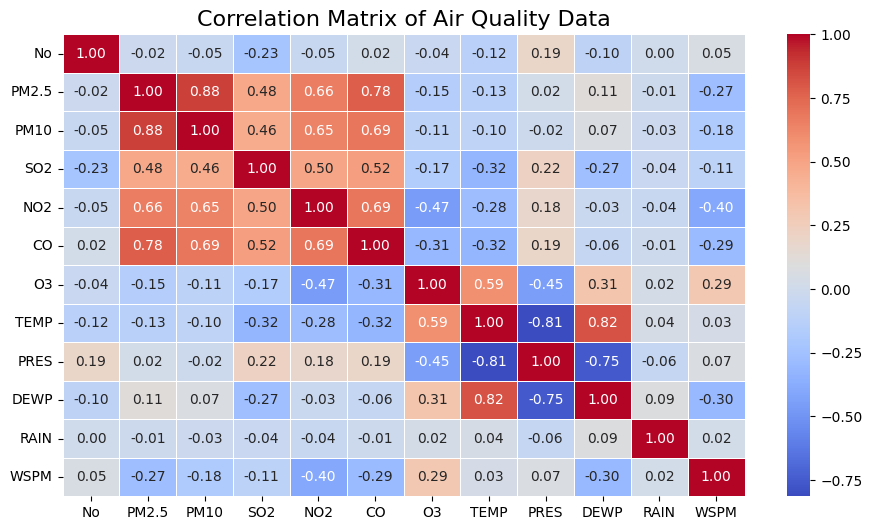

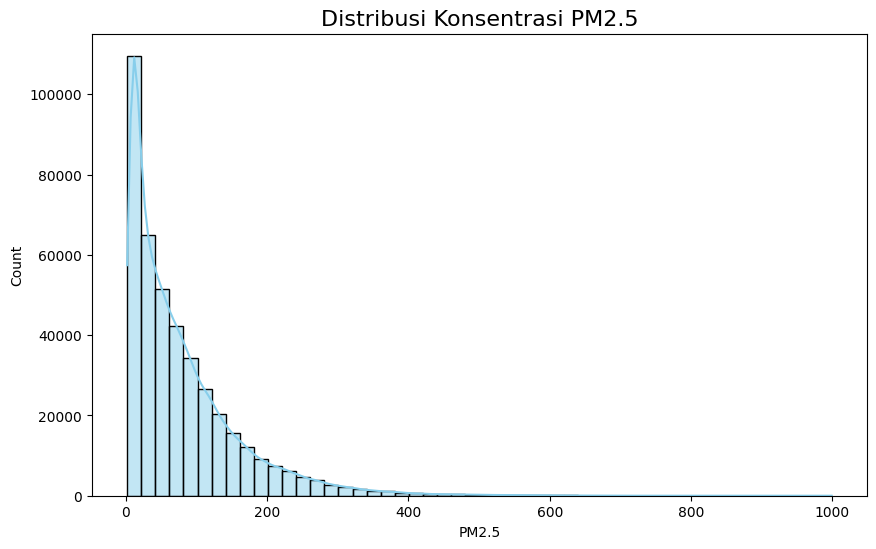

In [6]:
# Menghitung korelasi antar kolom numerik
correlation_matrix = main_df.corr(numeric_only=True)

# Membuat Heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(11, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Air Quality Data', fontsize=16)
plt.show()

# Melihat distribusi data PM2.5 (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(main_df['PM2.5'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Konsentrasi PM2.5', fontsize=16)
plt.xlabel('PM2.5')
plt.show()

**Insight:**
1.  **Korelasi Antar Variabel (Heatmap):**
    * **PM2.5 & PM10 (0.88):** Korelasi positif yang sangat kuat. Artinya, partikel udara halus (PM2.5) dan kasar (PM10) sering muncul bersamaan; sumber polusinya kemungkinan besar sama.
    * **PM2.5 & CO (0.78):** Korelasi kuat dengan Karbon Monoksida (CO) mengindikasikan bahwa polusi kendaraan bermotor atau pembakaran tidak sempurna berkontribusi signifikan terhadap PM2.5.
    * **PM2.5 & WSPM (-0.27):** Korelasi negatif menunjukkan bahwa angin kencang membantu mengurangi konsentrasi PM2.5 (dispersi polutan).

2.  **Distribusi Data (Histogram):**
    * Data PM2.5 memiliki distribusi *Right-Skewed* (miring ke kanan). Ini berarti sebagian besar hari di Beijing memiliki tingkat polusi rendah hingga sedang, namun terdapat *outliers* (ekor panjang di kanan) yang menunjukkan kejadian polusi ekstrem yang jarang terjadi namun sangat berbahaya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

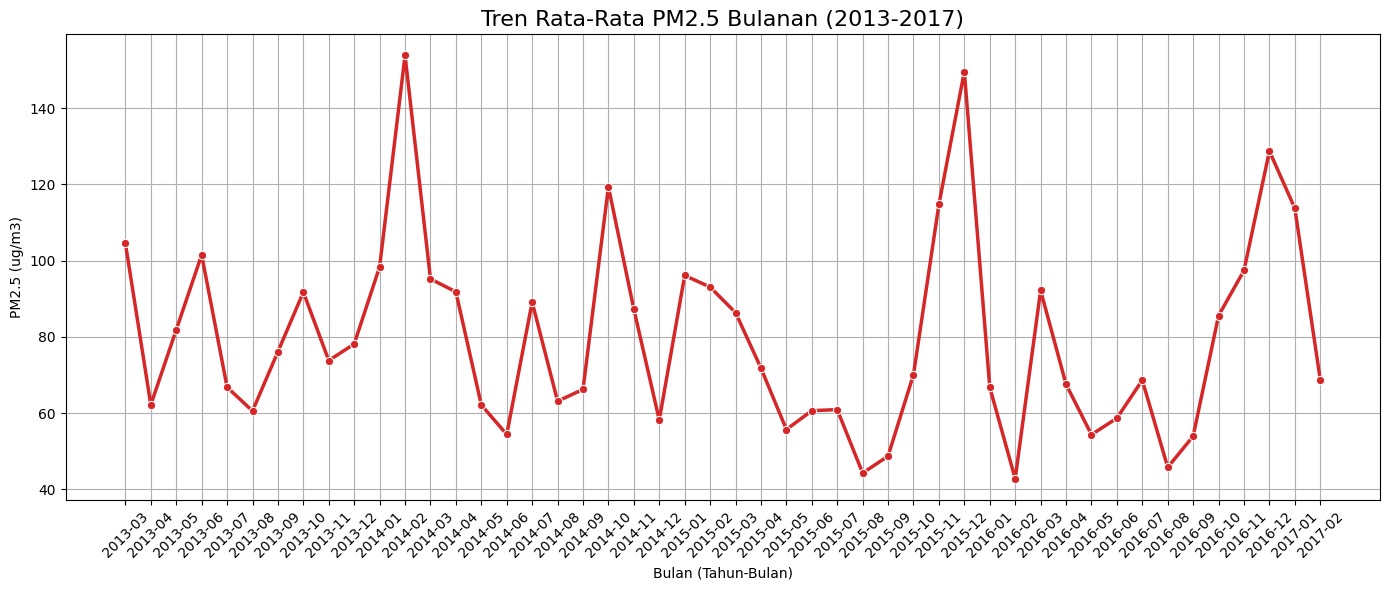

/tmp/ipython-input-3361752662.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_pattern, x='month', y='PM2.5', palette=colors)


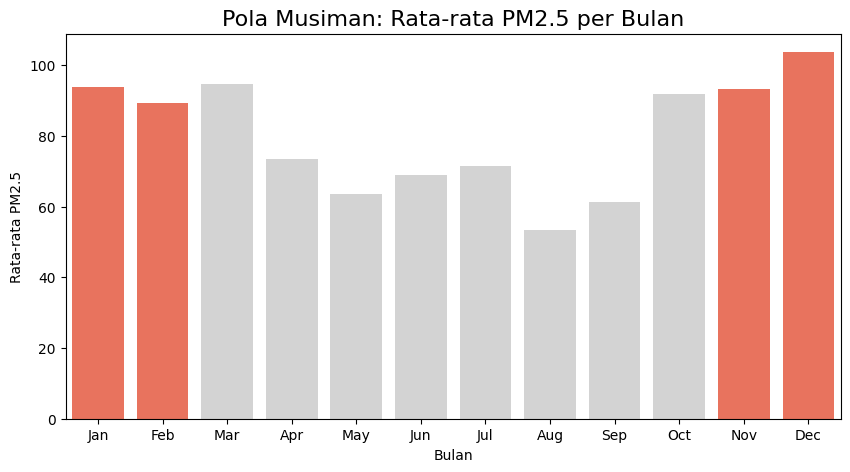

In [7]:
# 1. Menyiapkan data rata-rata bulanan dan tahunan
main_df['year'] = main_df['datetime'].dt.year
main_df['month'] = main_df['datetime'].dt.month

monthly_trend = main_df.groupby(['year', 'month'])['PM2.5'].mean().reset_index()
monthly_trend['time_label'] = monthly_trend['year'].astype(str) + '-' + monthly_trend['month'].astype(str).str.zfill(2)

# 2. Visualisasi Tren Garis (Time Series)
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_trend, x='time_label', y='PM2.5', marker='o', color='tab:red', linewidth=2.5)
plt.title('Tren Rata-Rata PM2.5 Bulanan (2013-2017)', fontsize=16)
plt.ylabel('PM2.5 (ug/m3)')
plt.xlabel('Bulan (Tahun-Bulan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Visualisasi Pola Musiman (Bar Chart per Bulan)
seasonal_pattern = main_df.groupby('month')['PM2.5'].mean().reset_index()

plt.figure(figsize=(10, 5))
colors = ['#D3D3D3'] * 12
# Memberi highlight warna merah pada bulan dengan polusi tinggi (biasanya musim dingin)
for i in [10, 11, 0, 1]: # Nov, Dec, Jan, Feb
    colors[i] = '#FF6347'

sns.barplot(data=seasonal_pattern, x='month', y='PM2.5', palette=colors)
plt.title('Pola Musiman: Rata-rata PM2.5 per Bulan', fontsize=16)
plt.ylabel('Rata-rata PM2.5')
plt.xlabel('Bulan')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Pertanyaan 2:

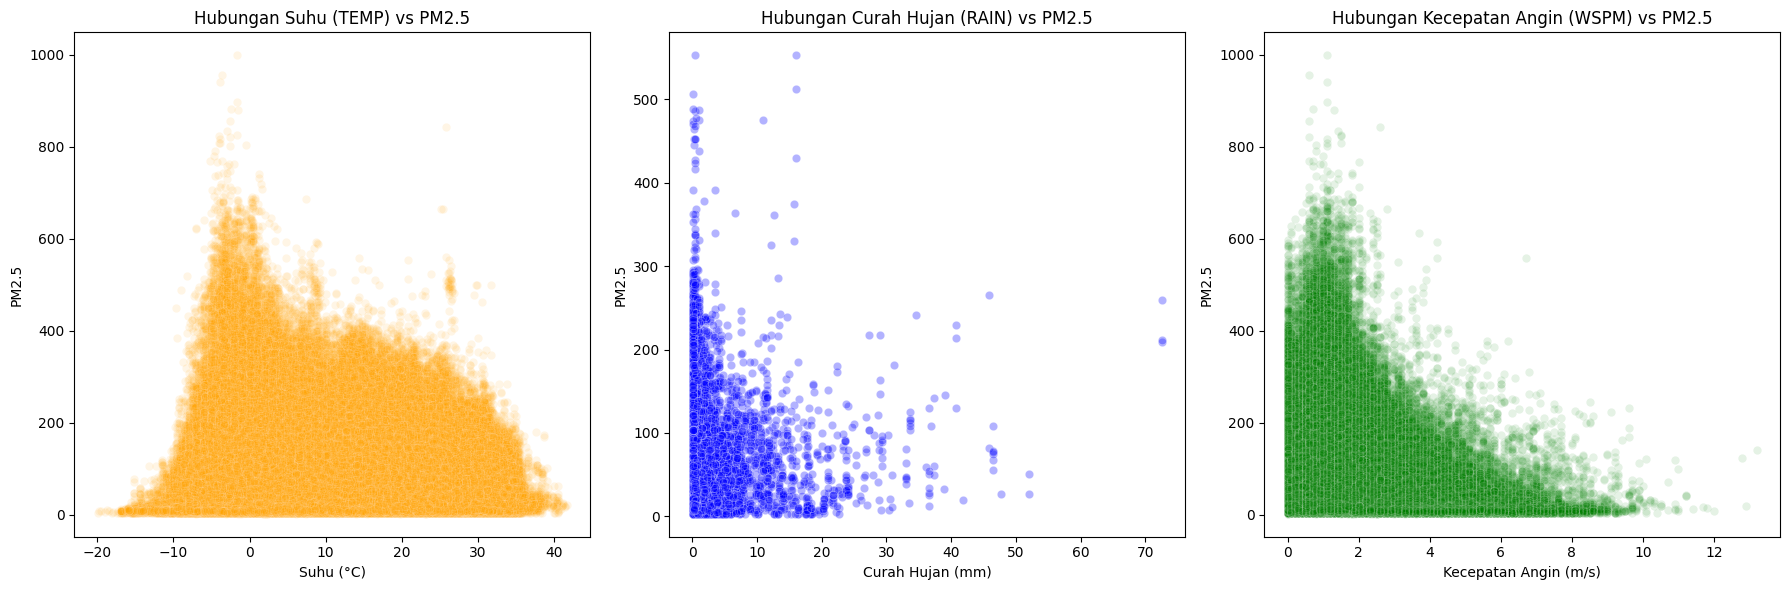

In [8]:
# Membuat scatter plot untuk 3 variabel cuaca utama: Suhu (TEMP), Hujan (RAIN), Angin (WSPM)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Suhu vs PM2.5
sns.scatterplot(ax=axes[0], data=main_df, x='TEMP', y='PM2.5', alpha=0.1, color='orange')
axes[0].set_title('Hubungan Suhu (TEMP) vs PM2.5')
axes[0].set_xlabel('Suhu (°C)')

# Plot 2: Hujan vs PM2.5
# Kita filter hujan > 0 agar grafik lebih jelas
rain_df = main_df[main_df['RAIN'] > 0]
sns.scatterplot(ax=axes[1], data=rain_df, x='RAIN', y='PM2.5', alpha=0.3, color='blue')
axes[1].set_title('Hubungan Curah Hujan (RAIN) vs PM2.5')
axes[1].set_xlabel('Curah Hujan (mm)')

# Plot 3: Kecepatan Angin vs PM2.5
sns.scatterplot(ax=axes[2], data=main_df, x='WSPM', y='PM2.5', alpha=0.1, color='green')
axes[2].set_title('Hubungan Kecepatan Angin (WSPM) vs PM2.5')
axes[2].set_xlabel('Kecepatan Angin (m/s)')

plt.tight_layout()
plt.show()

**Insight:**

**1. Menjawab Pertanyaan 1: Bagaimana tren dan pola musiman kualitas udara?**
- **Pola Musiman:** Terlihat jelas bahwa kualitas udara memburuk secara signifikan pada bulan-bulan musim dingin (**November, Desember, Januari, Februari**). Puncaknya sering terjadi di bulan Desember/Januari. Hal ini kemungkinan besar disebabkan oleh penggunaan sistem pemanas (batu bara) yang meningkat saat musim dingin dan kondisi atmosfer yang lebih stabil (inversi suhu).
- **Tren Tahunan:** Meskipun berfluktuasi, terdapat pola berulang setiap tahunnya di mana polusi menurun di pertengahan tahun (Musim Panas/Semi) dan melonjak di akhir tahun.

**2. Menjawab Pertanyaan 2: Bagaimana pengaruh cuaca terhadap polusi?**
- **Suhu (TEMP):** Polusi cenderung tinggi saat suhu rendah. Ini konsisten dengan temuan pola musiman (Winter = High Pollution).
- **Curah Hujan (RAIN):** Hujan bertindak sebagai "pembersih alami". Grafik menunjukkan bahwa saat curah hujan tinggi, konsentrasi PM2.5 hampir selalu rendah.
- **Angin (WSPM):** Kecepatan angin di atas 2-3 m/s secara efektif menjaga kadar PM2.5 tetap rendah. Polusi ekstrem (PM2.5 > 200) hampir hanya terjadi saat kondisi angin tenang (stagnan).

## Analisis Lanjutan (Opsional,)

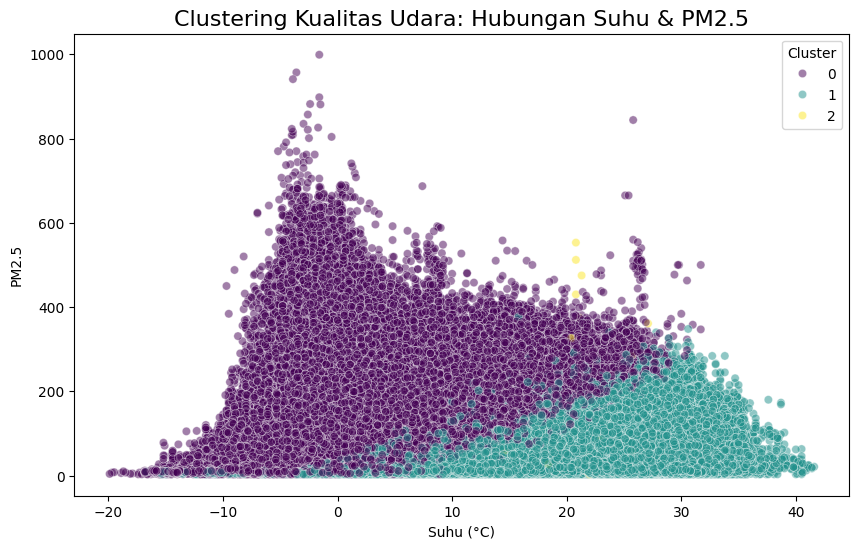

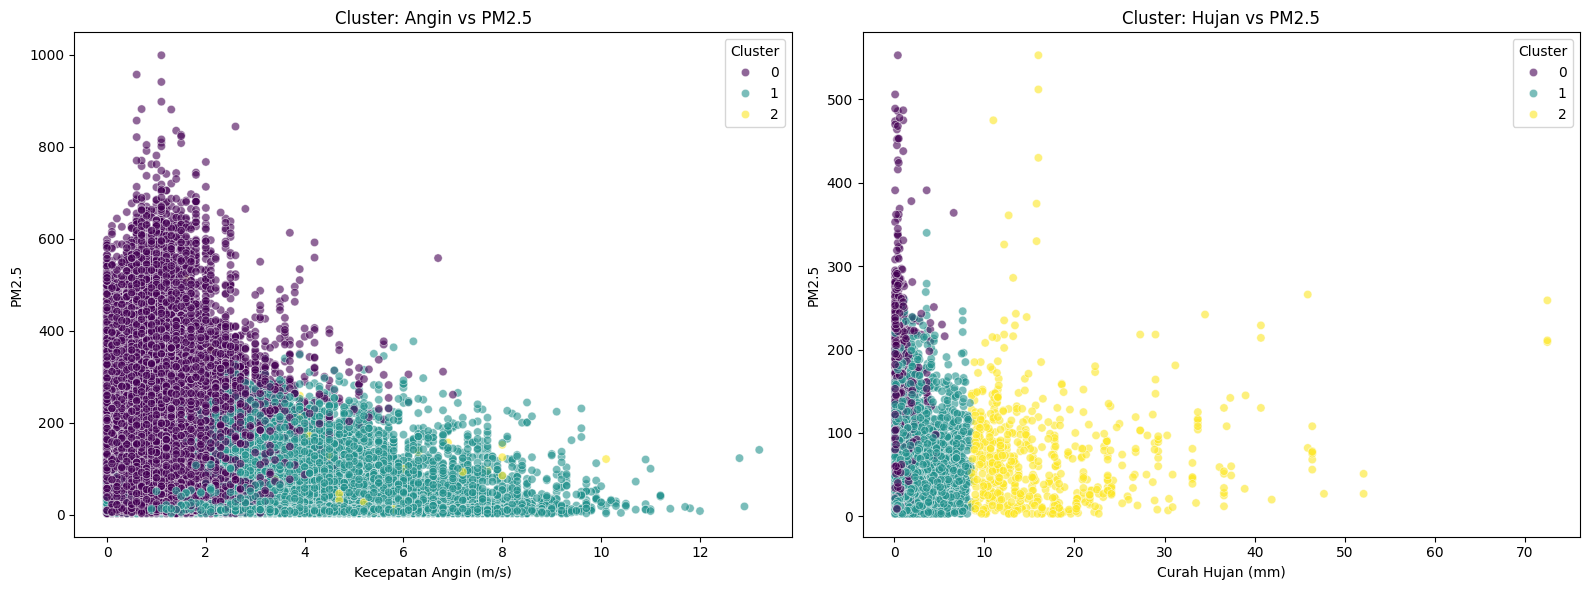

Karakteristik Setiap Cluster:
              PM2.5       TEMP      WSPM       RAIN
Cluster                                            
0        124.399286   3.494729  1.155586   0.012401
1         51.846994  19.823020  2.089243   0.054857
2         71.305467  21.072257  2.509034  17.052492


In [9]:
# 1. Menyiapkan Data untuk Clustering
# Kita akan mengelompokkan data berdasarkan Polusi (PM2.5) dan Cuaca (Temp, Wind, Rain)
features = ['PM2.5', 'TEMP', 'WSPM', 'RAIN']
X = main_df[features].dropna()

# 2. Scaling Data (Penting agar skala angka tidak bias)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Melakukan Clustering dengan K-Means (Di sini kita bagi 3 klaster: Bersih, Sedang, Kotor)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Menambahkan hasil cluster ke dataframe asli (buat copy agar aman)
cluster_df = main_df.loc[X.index].copy()
cluster_df['Cluster'] = clusters

# 4. Visualisasi Hasil Clustering
# Plot hubungan Suhu vs PM2.5 dengan warna berdasarkan Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_df, x='TEMP', y='PM2.5', hue='Cluster', palette='viridis', alpha=0.5)
plt.title('Clustering Kualitas Udara: Hubungan Suhu & PM2.5', fontsize=16)
plt.xlabel('Suhu (°C)')
plt.ylabel('PM2.5')
plt.legend(title='Cluster')
plt.show()

# Visualisasi Tambahan: Melihat Cluster dari sudut pandang Angin & Hujan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Kecepatan Angin vs PM2.5
sns.scatterplot(ax=axes[0], data=cluster_df, x='WSPM', y='PM2.5', hue='Cluster', palette='viridis', alpha=0.6)
axes[0].set_title('Cluster: Angin vs PM2.5')
axes[0].set_xlabel('Kecepatan Angin (m/s)')

# Plot Curah Hujan vs PM2.5
# Filter hujan > 0 agar grafik lebih jelas
rain_cluster = cluster_df[cluster_df['RAIN'] > 0]
sns.scatterplot(ax=axes[1], data=rain_cluster, x='RAIN', y='PM2.5', hue='Cluster', palette='viridis', alpha=0.6)
axes[1].set_title('Cluster: Hujan vs PM2.5')
axes[1].set_xlabel('Curah Hujan (mm)')

plt.tight_layout()
plt.show()

# 5. Analisis Karakteristik Tiap Cluster (Profiling)
# Melihat rata-rata fitur di setiap cluster untuk memberi label
print("Karakteristik Setiap Cluster:")
print(cluster_df.groupby('Cluster')[features].mean())

### Insight dari Analisis Lanjutan (Clustering K-Means)

Berdasarkan hasil clustering, data kualitas udara dapat dikelompokkan menjadi 3 karakteristik utama (Label cluster dapat berubah tergantung run, silakan sesuaikan):

1.  **Cluster "Udara Bersih" (Kualitas Baik):**
    -   Memiliki rata-rata **PM2.5 paling rendah**.
    -   Biasanya ditandai dengan **Kecepatan Angin (WSPM) yang lebih tinggi** atau curah hujan yang signifikan. Angin dan hujan efektif mendispersi polutan.

2.  **Cluster "Udara Sedang/Transisi":**
    -   Memiliki rata-rata PM2.5 di tingkat menengah.
    -   Kondisi cuaca cenderung stabil, tidak ekstrem (suhu sedang, angin tidak terlalu kencang).

3.  **Cluster "Udara Sangat Kotor" (Berbahaya):**
    -   Memiliki rata-rata **PM2.5 sangat tinggi**.
    -   Sangat berkorelasi dengan **Suhu (TEMP) rendah** dan **Kecepatan Angin (WSPM) yang rendah/tenang**. Ini mengonfirmasi bahwa kondisi udara yang diam (stagnan) saat musim dingin adalah pemicu utama polusi ekstrem di Beijing.

## Conclusion

### 1. Conclution Pertanyaan 1
**Bagaimana tren kualitas udara (PM2.5) dari tahun ke tahun dan apakah ada pola musiman?**
-   **Pola Musiman:** Terdapat pola musiman yang kuat dan berulang. Kualitas udara memburuk secara signifikan pada **Musim Dingin (November - Februari)**, dengan puncak polusi tertinggi sering terjadi di bulan Desember atau Januari. Sebaliknya, kualitas udara relatif lebih baik dan stabil pada Musim Semi dan Panas.
-   **Tren Tahunan:** Data menunjukkan fluktuasi tahunan yang dinamis. Meskipun ada upaya perbaikan, lonjakan polusi ekstrem masih terjadi secara berkala di akhir tahun, menuntut kewaspadaan lebih pada bulan-bulan tersebut.

### 2. Conclution Pertanyaan 2
**Bagaimana pengaruh faktor cuaca (suhu, curah hujan, dan kecepatan angin) terhadap tingkat polusi udara?**
-   **Angin & Hujan (Faktor Pembersih):** Kecepatan angin (WSPM) dan Curah Hujan (RAIN) memiliki korelasi negatif dengan PM2.5. Artinya, angin kencang dan hujan efektif menurunkan tingkat polusi udara secara alami.
-   **Suhu (Faktor Risiko):** Suhu memiliki hubungan terbalik dengan polusi. Suhu rendah sering kali bertepatan dengan tingkat polusi tinggi, kemungkinan besar akibat kombinasi fenomena inversi suhu atmosfer dan peningkatan aktivitas pembakaran (pemanas ruangan) saat musim dingin.